# 02 Preprocessing with Exploratory Data Analysis (EDA)

In this notebook, we will do preliminary processing of textual data and explore the data that was colleccted in 01_Data.py.

*Note: Preprocessing will be done in 05_Baseline-Model-Classification notebook*

In [1]:
import re
import string
import warnings

import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ernestchng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
warnings.filterwarnings('ignore')

## Read Raw Data

Here, we uploaded our raw_data onto dropbox because it was too large to be hosted on Github (>100MB). 

*Note: Please refer to 01_Data.py on how we collected our macro and textual data.*

In [4]:
data = pd.read_csv('https://www.dropbox.com/s/l0y4g1t96ry4eyn/raw_data.txt?dl=1')
data = data.set_index('date')
data.index = pd.to_datetime(data.index)

In [5]:
data.head()

,GDPC1,CPIAUCSL,UNRATE,PAYEMS,RRSFS,GFDEBTN,VIXCLS,DFF,minutes,minutes_speaker,speeches,speeches_speaker,statements,statements_speaker,testimony,testimony_speaker,pressconf,pressconf_speaker,text
date,,,,,,,,,,,,,,,,,,,
2006-01-31,15267.026000,199.3,4.7,135429.0,179293.0,8.371156e+06,12.95,4.47,A meeting of the Federal Open Market Committe...,Alan Greenspan,I thank you for the invitation to speak today...,"['Governor Susan Schmidt Bies', 'Chairman Ben ...",The Federal Open Market Committee decided tod...,Alan Greenspan,Chairman Bernanke presented identical testimo...,['Chairman Ben S. Bernanke'],CHAIRMAN GREENSPAN. Thank you all very much....,Alan Greenspan,A meeting of the Federal Open Market Committe...
2006-02-28,15278.919000,199.4,4.8,135737.0,177887.0,8.387451e+06,12.34,4.52,A meeting of the Federal Open Market Committe...,Ben Bernanke,I appreciate the opportunity to speak to you ...,"['Vice Chairman Roger W. Ferguson, Jr.', 'Chai...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...",['Governor Donald L. Kohn'],"CHAIRMAN BERNANKE. Welcome, everyone. It ha...",Ben Bernanke,A meeting of the Federal Open Market Committe...
2006-03-31,15290.812000,199.7,4.7,136047.0,178100.0,8.403747e+06,11.39,5.00,NaN,NaN,I am pleased to participate in the panel disc...,"['Vice Chairman Roger W. Ferguson, Jr.', 'Gove...",NaN,NaN,"Mr. Chairman and members of the Committee, I ...",['Chairman Ben S. Bernanke'],NaN,NaN,I am pleased to participate in the panel disc...
2006-04-30,15302.705000,200.7,4.7,136205.0,178088.0,8.420042e+06,11.59,4.86,A meeting of the Federal Open Market Committe...,Ben Bernanke,I would like to thank Operation HOPE and the ...,"['Chairman Ben S. Bernanke', 'Governor Susan S...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Hagel, Senator Dodd, and members of ...","['Patrick M. Parkinson, Deputy Director, Divis...","CHAIRMAN BERNANKE. Good morning, everyone. ...",Ben Bernanke,A meeting of the Federal Open Market Committe...
2006-05-31,15310.592667,201.3,4.6,136244.0,177200.0,8.449019e+06,16.44,5.05,A meeting of the Federal Open Market Committe...,Ben Bernanke,I am pleased to be here this afternoon to par...,"['Chairman Ben S. Bernanke', 'Governor Susan S...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...","['Governor Donald L. Kohn', 'Governor Mark W. ...","CHAIRMAN BERNANKE. Good afternoon, everybody...",Ben Bernanke,A meeting of the Federal Open Market Committe...


In [6]:
data.tail()

,GDPC1,CPIAUCSL,UNRATE,PAYEMS,RRSFS,GFDEBTN,VIXCLS,DFF,minutes,minutes_speaker,speeches,speeches_speaker,statements,statements_speaker,testimony,testimony_speaker,pressconf,pressconf_speaker,text
date,,,,,,,,,,,,,,,,,,,
2020-10-31,18794.426,260.462,6.9,142545.0,212005.0,27747798.0,38.02,0.09,"November 4-5, 2020A joint meeting of the Fede...",Jerome Powell,"Two years ago, I had the pleasure of visiting...","['Governor Lael Brainard', 'Vice Chair Richard...",The Federal Reserve is committed to using its...,Jerome Powell,Vice Chair for Supervision Quarles submitted ...,['Vice Chair for Supervision Randal K. Quarles'],CHAIR POWELL. Good afternoon. At the Federa...,Jerome Powell,"November 4-5, 2020A joint meeting of the Fede..."
2020-11-30,18794.426,260.927,6.7,142809.0,208966.0,27747798.0,20.57,0.09,"December 15-16, 2020\nA joint meeting of the ...",Jerome Powell,The Federal Reserve is committed to providing...,"['Governor Lael Brainard', 'Governor Michelle ...",The Federal Reserve is committed to using its...,Jerome Powell,Chair Powell submitted identical remarks to t...,['Chair Jerome H. Powell'],CHAIR POWELL. Good afternoon. At the Federa...,Jerome Powell,"December 15-16, 2020\nA joint meeting of the ..."
2020-12-31,18794.426,261.560,6.7,142503.0,205818.0,27747798.0,22.75,0.09,"January 26-27, 2021A joint meeting of the Fed...",Jerome Powell,Current Economic Situation and Outlook\nIn th...,"['Vice Chair Richard H. Clarida', 'Governor La...",The Federal Reserve is committed to using its...,Jerome Powell,NaN,[''],CHAIR POWELL. Good afternoon. At the Federa...,Jerome Powell,"January 26-27, 2021A joint meeting of the Fed..."
2021-01-31,18794.426,262.231,6.3,142736.0,221008.0,27747798.0,33.09,0.07,NaN,NaN,Today I will discuss the state of our labor m...,"['Chair Jerome H. Powell', 'Governor Michelle ...",NaN,NaN,Chair Powell submitted identical remarks to t...,['Chair Jerome H. Powell'],NaN,NaN,Today I will discuss the state of our labor m...
2021-02-28,18794.426,263.161,6.2,143204.0,214216.0,27747798.0,27.95,0.07,NaN,NaN,NaN,[''],NaN,NaN,NaN,[''],NaN,NaN,NaN


### Shape of data
Here, our data has 182 rows and 19 columns

In [7]:
data.shape

(182, 19)

### Removing the last row

Here, we decided to remove the last row (2021-02-28) as no FOMC meetings occurred at the date of data collection.

In [8]:
data = data.dropna(subset=['text'])

In [9]:
data.shape

(181, 19)

## Preprocessing Textual Data

Here, we will remove punctuation, make lowercase, strip, remove integers, tokenize words, lemmatize words and remove
stopwords from the textual data.

In [10]:
def clean_text(sentence):
    """
    Description: Main method for cleaning text by removing punctuations, integers, whitespaces and making lowercase

    Input:
    * String: The string to be preprocessed.

    Return:
    * String: The cleaned string.
    """
    
    
    def replace_punctuation(sentence):
        """
        Description: Replaces punctuation in string with space.

        Input:
        * String: The string to be preprocessed.

        Return:
        * String: The string with punctuation replaced with space.
        """
        return sentence.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

    def make_lower_and_strip(sentence):
        """
        Description: Strip string and make lowercase.

        Input:
        * String: The string to be preprocessed.

        Return:
        * String: The string stripped and made lowercase.
        """
        return re.sub(r'[^\w\s]', '', sentence.lower().strip())

    def remove_integer(sentence):
        """
        Description: Removes integers in string.

        Input:
        * String: The string to be preprocessed.

        Return:
        * String: The string with integers removed.
        """
        return re.sub(r'[0-9]+', '', sentence)
    
    try:
        return replace_punctuation(make_lower_and_strip(remove_integer(sentence)))
    except:
        return None
    
def tokenize(sentence):
    """
    Description: Tokenizes sentence into list of words.

    Input:
    * String: The string to be tokenized.

    Return:
    * List: The list of words in the sentence.
    """
    try:
        word_list = sentence.split()
        return word_list
    except:
        return None
    
def lemmatize(word_list):
    """
    Description: Lemmatizes list of words.

    Input:
    * List: The list of words to be lemmatized.

    Return:
    * List: The list of words that is lemmatized.
    """
    try:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        pos_list = ['a', 'r', 'n', 'v']
        for pos in pos_list:
            word_list = [lem.lemmatize(word, pos) for word in word_list]
        return word_list
    except:
        return None

def remove_stopwords(word_list, stopwords=None):
    """
    Description: Removes stopwords and words with length less than 4.

    Input:
    * List: The list of words to be preprocessed.

    Return:
    * List: The list of words with stopwords and words with length less than 4 removed.
    """
    try:
        if stopwords is not None:
            return [word for word in word_list if ((word not in stopwords) and len(word) > 3)]
        else:
            return [word for word in word_list if len(word) > 3]
    except:
        return None

### Clean & Tokenize Text

In [11]:
data['cleaned'] = data.text.apply(lambda x: clean_text(x))
data['cleaned_token'] = data.cleaned.apply(lambda x: tokenize(x))
data.head()

,GDPC1,CPIAUCSL,UNRATE,PAYEMS,RRSFS,GFDEBTN,VIXCLS,DFF,minutes,minutes_speaker,...,speeches_speaker,statements,statements_speaker,testimony,testimony_speaker,pressconf,pressconf_speaker,text,cleaned,cleaned_token
date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,15267.026000,199.3,4.7,135429.0,179293.0,8.371156e+06,12.95,4.47,A meeting of the Federal Open Market Committe...,Alan Greenspan,...,"['Governor Susan Schmidt Bies', 'Chairman Ben ...",The Federal Open Market Committee decided tod...,Alan Greenspan,Chairman Bernanke presented identical testimo...,['Chairman Ben S. Bernanke'],CHAIRMAN GREENSPAN. Thank you all very much....,Alan Greenspan,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c..."
2006-02-28,15278.919000,199.4,4.8,135737.0,177887.0,8.387451e+06,12.34,4.52,A meeting of the Federal Open Market Committe...,Ben Bernanke,...,"['Vice Chairman Roger W. Ferguson, Jr.', 'Chai...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...",['Governor Donald L. Kohn'],"CHAIRMAN BERNANKE. Welcome, everyone. It ha...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c..."
2006-03-31,15290.812000,199.7,4.7,136047.0,178100.0,8.403747e+06,11.39,5.00,NaN,NaN,...,"['Vice Chairman Roger W. Ferguson, Jr.', 'Gove...",NaN,NaN,"Mr. Chairman and members of the Committee, I ...",['Chairman Ben S. Bernanke'],NaN,NaN,I am pleased to participate in the panel disc...,i am pleased to participate in the panel discu...,"[i, am, pleased, to, participate, in, the, pan..."
2006-04-30,15302.705000,200.7,4.7,136205.0,178088.0,8.420042e+06,11.59,4.86,A meeting of the Federal Open Market Committe...,Ben Bernanke,...,"['Chairman Ben S. Bernanke', 'Governor Susan S...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Hagel, Senator Dodd, and members of ...","['Patrick M. Parkinson, Deputy Director, Divis...","CHAIRMAN BERNANKE. Good morning, everyone. ...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c..."
2006-05-31,15310.592667,201.3,4.6,136244.0,177200.0,8.449019e+06,16.44,5.05,A meeting of the Federal Open Market Committe...,Ben Bernanke,...,"['Chairman Ben S. Bernanke', 'Governor Susan S...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...","['Governor Donald L. Kohn', 'Governor Mark W. ...","CHAIRMAN BERNANKE. Good afternoon, everybody...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c..."


### Remove Stopwords

In [12]:
stop_words = stopwords.words('english')
stop_words.extend(['would','also','could', 'going']) # extending stop words based on our context
data['cleaned_tokenized_nostop'] = data.cleaned_token.apply(lambda x: remove_stopwords(x, stop_words))
data.head()

,GDPC1,CPIAUCSL,UNRATE,PAYEMS,RRSFS,GFDEBTN,VIXCLS,DFF,minutes,minutes_speaker,...,statements,statements_speaker,testimony,testimony_speaker,pressconf,pressconf_speaker,text,cleaned,cleaned_token,cleaned_tokenized_nostop
date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,15267.026000,199.3,4.7,135429.0,179293.0,8.371156e+06,12.95,4.47,A meeting of the Federal Open Market Committe...,Alan Greenspan,...,The Federal Open Market Committee decided tod...,Alan Greenspan,Chairman Bernanke presented identical testimo...,['Chairman Ben S. Bernanke'],CHAIRMAN GREENSPAN. Thank you all very much....,Alan Greenspan,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he..."
2006-02-28,15278.919000,199.4,4.8,135737.0,177887.0,8.387451e+06,12.34,4.52,A meeting of the Federal Open Market Committe...,Ben Bernanke,...,The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...",['Governor Donald L. Kohn'],"CHAIRMAN BERNANKE. Welcome, everyone. It ha...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he..."
2006-03-31,15290.812000,199.7,4.7,136047.0,178100.0,8.403747e+06,11.39,5.00,NaN,NaN,...,NaN,NaN,"Mr. Chairman and members of the Committee, I ...",['Chairman Ben S. Bernanke'],NaN,NaN,I am pleased to participate in the panel disc...,i am pleased to participate in the panel discu...,"[i, am, pleased, to, participate, in, the, pan...","[pleased, participate, panel, discussion, inst..."
2006-04-30,15302.705000,200.7,4.7,136205.0,178088.0,8.420042e+06,11.59,4.86,A meeting of the Federal Open Market Committe...,Ben Bernanke,...,The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Hagel, Senator Dodd, and members of ...","['Patrick M. Parkinson, Deputy Director, Divis...","CHAIRMAN BERNANKE. Good morning, everyone. ...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he..."
2006-05-31,15310.592667,201.3,4.6,136244.0,177200.0,8.449019e+06,16.44,5.05,A meeting of the Federal Open Market Committe...,Ben Bernanke,...,The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...","['Governor Donald L. Kohn', 'Governor Mark W. ...","CHAIRMAN BERNANKE. Good afternoon, everybody...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he..."


## Exploratory Data Analysis (EDA)

Here, our intention is to take a look at the data that we have collected - both Macro and Textual.

### EDA - Macro data


In [13]:
macro_columns = ['GDPC1',
                'CPIAUCSL',
                'UNRATE',
                'PAYEMS',
                'RRSFS',
                'GFDEBTN',
                'VIXCLS',
                'DFF'] # inclusive of Effective Federal Funds Rate

macro = data[macro_columns]
macro.head()

,GDPC1,CPIAUCSL,UNRATE,PAYEMS,RRSFS,GFDEBTN,VIXCLS,DFF
date,,,,,,,,
2006-01-31,15267.026000,199.3,4.7,135429.0,179293.0,8.371156e+06,12.95,4.47
2006-02-28,15278.919000,199.4,4.8,135737.0,177887.0,8.387451e+06,12.34,4.52
2006-03-31,15290.812000,199.7,4.7,136047.0,178100.0,8.403747e+06,11.39,5.00
2006-04-30,15302.705000,200.7,4.7,136205.0,178088.0,8.420042e+06,11.59,4.86
2006-05-31,15310.592667,201.3,4.6,136244.0,177200.0,8.449019e+06,16.44,5.05


### Macro data (Reference)
- 'GDPC1': 'Real GDP',
- 'CPIAUCSL': 'Consumer Price Index (CPI)',
- 'UNRATE': 'Unemployment Rate',
- 'PAYEMS': 'Total NonFarm payrolls (Employment)',
- 'RRSFS': 'Real Retail and Food Services Sales',
- 'GFDEBTN': 'Federal Debt',
- 'VIXCLS': 'CBOE Volatility Index (VIX)',
- 'DFF': 'Effective Federal Funds Rate'

In [14]:
macro.describe()

,GDPC1,CPIAUCSL,UNRATE,PAYEMS,RRSFS,GFDEBTN,VIXCLS,DFF
count,181.000000,181.000000,181.000000,181.000000,181.000000,1.810000e+02,181.000000,181.000000
mean,16852.647558,231.418851,6.308287,139312.016575,182351.602210,1.655940e+07,19.726740,1.209613
std,1308.915916,17.145866,2.215021,6440.585196,14275.142409,5.160848e+06,8.916373,1.685051
min,15134.117000,199.300000,3.500000,129698.000000,155179.000000,8.371156e+06,9.510000,0.040000
25%,15695.457333,217.290000,4.600000,134331.000000,173531.000000,1.231135e+07,13.700000,0.090000
50%,16531.685000,232.937000,5.600000,137993.000000,179293.000000,1.677138e+07,17.010000,0.200000
75%,17977.299000,244.069000,8.200000,144150.000000,193897.000000,1.997683e+07,23.500000,1.910000
max,19253.959000,262.231000,14.800000,152523.000000,221008.000000,2.774780e+07,59.890000,5.410000


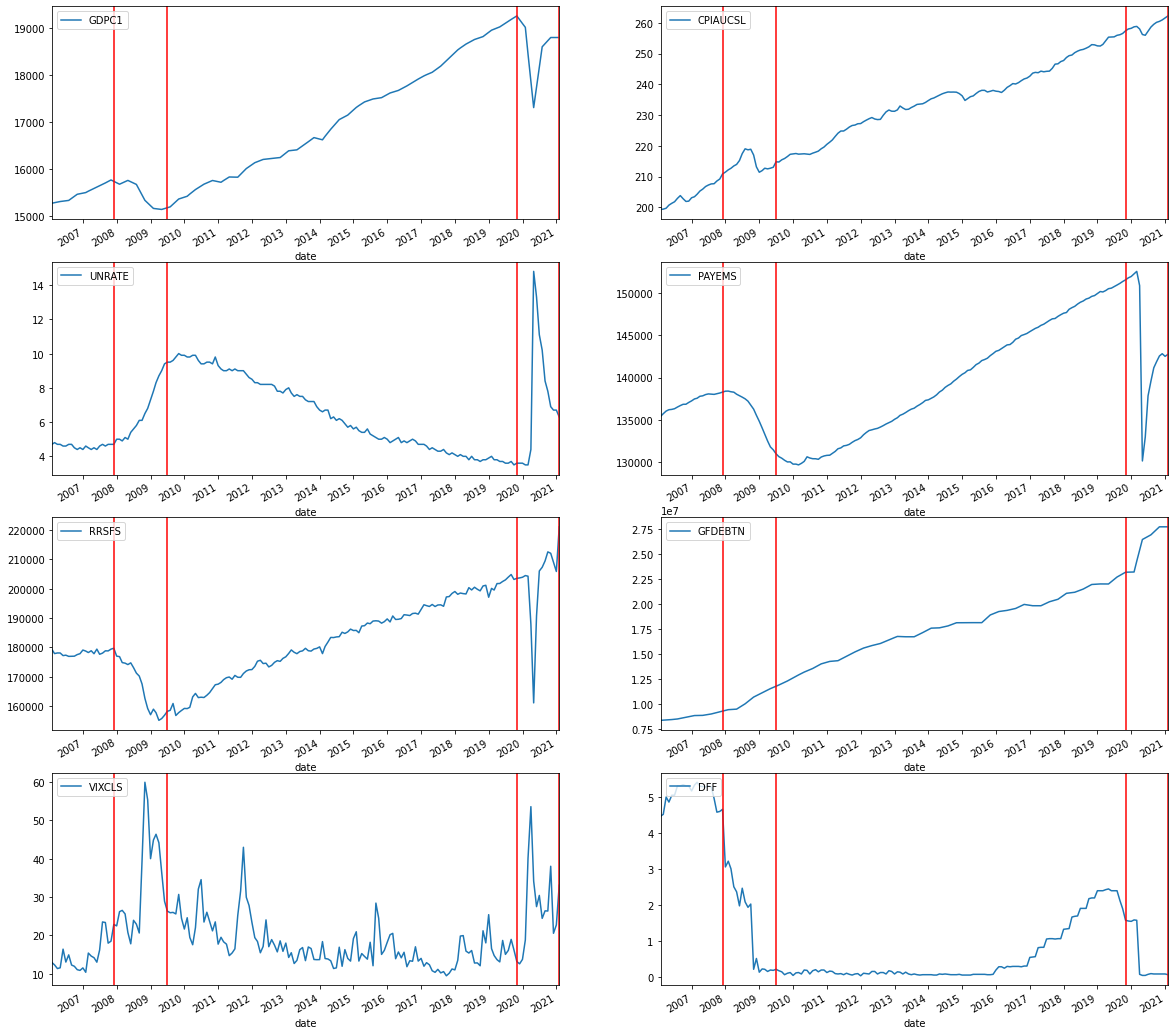

In [15]:
fig = plt.figure(figsize=(20,20))

index = 1
for indicator in list(macro.columns):
    df = macro[[indicator]]
    ax = plt.subplot(4,2,index)
    df.plot(ax=ax, x_compat=True)
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.legend(loc="upper left")
    index += 1
    
    # mark Financial Crisis period
    plt.axvline(x='2007-12-01', color='r')
    plt.axvline(x='2009-06-30', color='r')
    
    # mark COVID-19 period
    plt.axvline(x='2019-11-01', color='r')
    plt.axvline(x='2021-01-31', color='r')

#### Insights

GDP
- Overall, GDP has been increasing since 2006.
- GDP was seen to dip during the 2008 Financial Crisis and COVID-19 Pandemic where the US faced a recession.

Inflation
- Overall, inflation has also been increasing since 2006. 

Unemployment rate
- Mean Unemployment rate of US from 2006 to 2021 is around 6.3% (many consider 4-5% as a good range).
- Unemployment rate also seem to spike during periods of crisis.

Total NonFarm payrolls (Employment)
- Behaves similar to GDP

Real Retail and Food Services Sales
- Behaves similar to GDP

Federal Debt
- Overall, Federal Debt has been on the rise since 2006.
- This is expected as the US has been on a budget deficit ever since the 2008 Financial Crisis and former presidents (while they promise to reduce debt) have not found a way to reduce the federal debt.

CBOE Volatility Index (VIX)
- As a measure of the market sentiments, the VIX Index spikes during periods of crisis.

Effective Federal Funds Rate
- The Effective Federal Funds Rate seems to be lowered during periods of crisis.
- This matches the Fed's Dovish stance where they are in favour of lowering interest rates to stimulate the economy.

### Density Plot

Here, we look at the density plot for the macro variables.

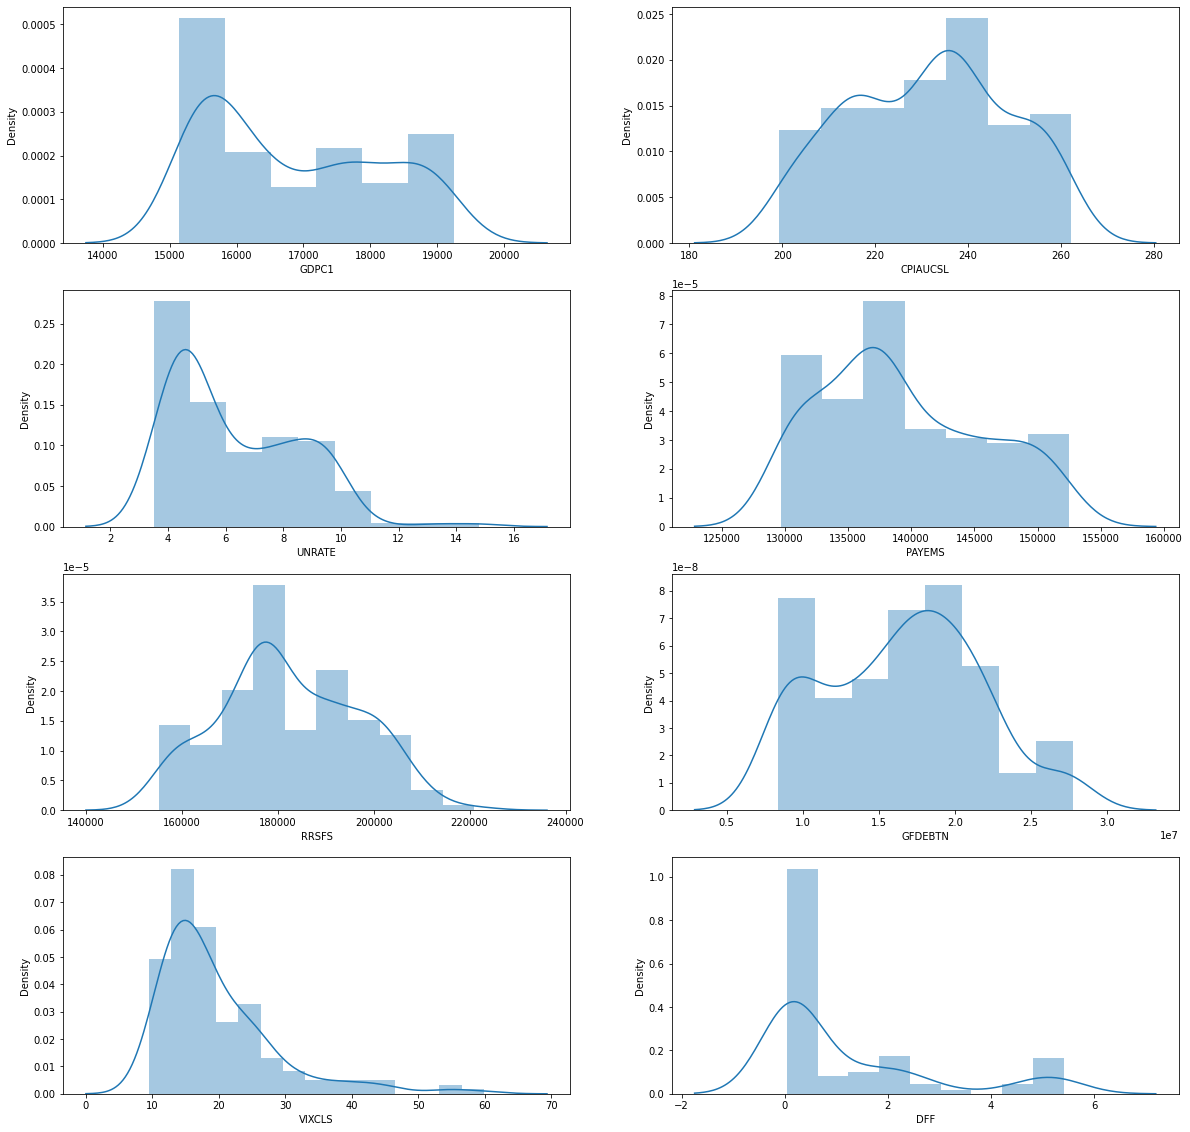

In [16]:
fig = plt.figure(figsize=(20,20))

index = 1
for indicator in list(macro.columns):
    ax = plt.subplot(4,2,index)
    sns.distplot(macro[indicator])
    index += 1

### Correlation Heatmap

To avoid multi-collinearity, we take a look at the correlation heat map between macro variables.

Taking a look at the first column (GDPC1), we can observe a few things that we would normally expect.
- GDP is highly positively correlated with Inflation
    - https://www.investopedia.com/ask/answers/112814/why-does-inflation-increase-gdp-growth.asp
- GDP is negatively correlated with Unemployment Rate
    - Normally, a booming economy warrants higher GDP where jobs are constantly being created. 
    - Naturally, the unemployment rate would decrease when GDP increases.
- GDP is highly positively correlated with Total Nonfarm payrolls (Employment) and Real Retail and Food Services Sales
    - Again, a booming economy would warrant better payrolls and sales

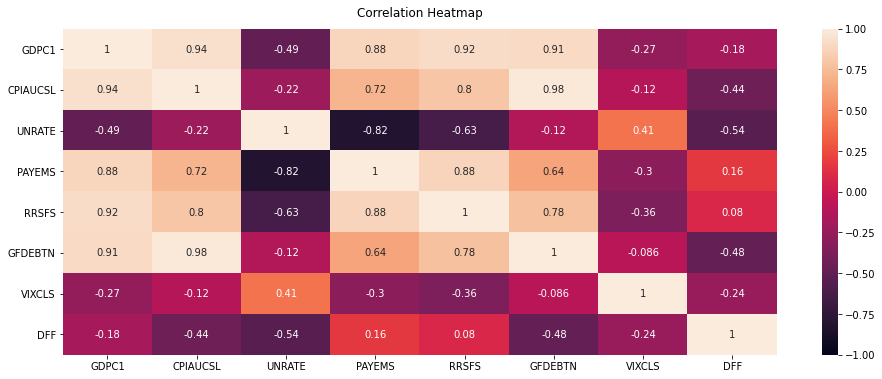

In [17]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(macro.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### EDA - Textual Data

### Combining cleaned text

Here, we would like to combine the cleaned text into a string again.

In [18]:
def combine_nostop_words(word_list):
    result = " ".join(word_list)
    return result

In [19]:
data['cleaned_nostop'] = data.cleaned_tokenized_nostop.apply(lambda x: combine_nostop_words(x))
data.head()

,GDPC1,CPIAUCSL,UNRATE,PAYEMS,RRSFS,GFDEBTN,VIXCLS,DFF,minutes,minutes_speaker,...,statements_speaker,testimony,testimony_speaker,pressconf,pressconf_speaker,text,cleaned,cleaned_token,cleaned_tokenized_nostop,cleaned_nostop
date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,15267.026000,199.3,4.7,135429.0,179293.0,8.371156e+06,12.95,4.47,A meeting of the Federal Open Market Committe...,Alan Greenspan,...,Alan Greenspan,Chairman Bernanke presented identical testimo...,['Chairman Ben S. Bernanke'],CHAIRMAN GREENSPAN. Thank you all very much....,Alan Greenspan,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he...",meeting federal open market committee held off...
2006-02-28,15278.919000,199.4,4.8,135737.0,177887.0,8.387451e+06,12.34,4.52,A meeting of the Federal Open Market Committe...,Ben Bernanke,...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...",['Governor Donald L. Kohn'],"CHAIRMAN BERNANKE. Welcome, everyone. It ha...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he...",meeting federal open market committee held off...
2006-03-31,15290.812000,199.7,4.7,136047.0,178100.0,8.403747e+06,11.39,5.00,NaN,NaN,...,NaN,"Mr. Chairman and members of the Committee, I ...",['Chairman Ben S. Bernanke'],NaN,NaN,I am pleased to participate in the panel disc...,i am pleased to participate in the panel discu...,"[i, am, pleased, to, participate, in, the, pan...","[pleased, participate, panel, discussion, inst...",pleased participate panel discussion institute...
2006-04-30,15302.705000,200.7,4.7,136205.0,178088.0,8.420042e+06,11.59,4.86,A meeting of the Federal Open Market Committe...,Ben Bernanke,...,Ben Bernanke,"Chairman Hagel, Senator Dodd, and members of ...","['Patrick M. Parkinson, Deputy Director, Divis...","CHAIRMAN BERNANKE. Good morning, everyone. ...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he...",meeting federal open market committee held off...
2006-05-31,15310.592667,201.3,4.6,136244.0,177200.0,8.449019e+06,16.44,5.05,A meeting of the Federal Open Market Committe...,Ben Bernanke,...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...","['Governor Donald L. Kohn', 'Governor Mark W. ...","CHAIRMAN BERNANKE. Good afternoon, everybody...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he...",meeting federal open market committee held off...


In [20]:
textual_cols = ['minutes', 
                'minutes_speaker', 
                'speeches', 
                'speeches_speaker',
                'statements', 
                'statements_speaker', 
                'testimony', 
                'testimony_speaker',
                'pressconf', 
                'pressconf_speaker', 
                'text', 
                'cleaned', 
                'cleaned_token',
                'cleaned_tokenized_nostop', 
                'cleaned_nostop']

textual = data[textual_cols]
textual.head()

,minutes,minutes_speaker,speeches,speeches_speaker,statements,statements_speaker,testimony,testimony_speaker,pressconf,pressconf_speaker,text,cleaned,cleaned_token,cleaned_tokenized_nostop,cleaned_nostop
date,,,,,,,,,,,,,,,
2006-01-31,A meeting of the Federal Open Market Committe...,Alan Greenspan,I thank you for the invitation to speak today...,"['Governor Susan Schmidt Bies', 'Chairman Ben ...",The Federal Open Market Committee decided tod...,Alan Greenspan,Chairman Bernanke presented identical testimo...,['Chairman Ben S. Bernanke'],CHAIRMAN GREENSPAN. Thank you all very much....,Alan Greenspan,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he...",meeting federal open market committee held off...
2006-02-28,A meeting of the Federal Open Market Committe...,Ben Bernanke,I appreciate the opportunity to speak to you ...,"['Vice Chairman Roger W. Ferguson, Jr.', 'Chai...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...",['Governor Donald L. Kohn'],"CHAIRMAN BERNANKE. Welcome, everyone. It ha...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he...",meeting federal open market committee held off...
2006-03-31,NaN,NaN,I am pleased to participate in the panel disc...,"['Vice Chairman Roger W. Ferguson, Jr.', 'Gove...",NaN,NaN,"Mr. Chairman and members of the Committee, I ...",['Chairman Ben S. Bernanke'],NaN,NaN,I am pleased to participate in the panel disc...,i am pleased to participate in the panel discu...,"[i, am, pleased, to, participate, in, the, pan...","[pleased, participate, panel, discussion, inst...",pleased participate panel discussion institute...
2006-04-30,A meeting of the Federal Open Market Committe...,Ben Bernanke,I would like to thank Operation HOPE and the ...,"['Chairman Ben S. Bernanke', 'Governor Susan S...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Hagel, Senator Dodd, and members of ...","['Patrick M. Parkinson, Deputy Director, Divis...","CHAIRMAN BERNANKE. Good morning, everyone. ...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he...",meeting federal open market committee held off...
2006-05-31,A meeting of the Federal Open Market Committe...,Ben Bernanke,I am pleased to be here this afternoon to par...,"['Chairman Ben S. Bernanke', 'Governor Susan S...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...","['Governor Donald L. Kohn', 'Governor Mark W. ...","CHAIRMAN BERNANKE. Good afternoon, everybody...",Ben Bernanke,A meeting of the Federal Open Market Committe...,a meeting of the federal open market committee...,"[a, meeting, of, the, federal, open, market, c...","[meeting, federal, open, market, committee, he...",meeting federal open market committee held off...


### Count of posts of each type

Here, we plot of number of posts for each type after preprocessing.

Naturally, there is a difference between the number of minutes, press conferences, speeches, statements, testimonies since they occur at different frequencies and follow their own schedules.

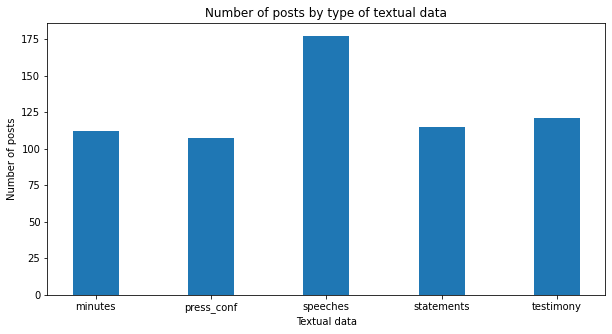

In [21]:
post_count = {
    'minutes': textual[['minutes']].dropna().shape[0],
    'press_conf': textual[['pressconf']].dropna().shape[0],
    'speeches': textual[['speeches']].dropna().shape[0],
    'statements': textual[['statements']].dropna().shape[0],
    'testimony': textual[['testimony']].dropna().shape[0]
}

fig = plt.figure(figsize = (10, 5))
plt.bar(list(post_count.keys()), list(post_count.values()), width = 0.4)
plt.xlabel("Textual data")
plt.ylabel("Number of posts")
plt.title("Number of posts by type of textual data")
plt.show()

In [22]:
for fomc_type, count in post_count.items():
    print(f'{fomc_type}: {count}')

minutes: 112
press_conf: 107
speeches: 177
statements: 115
testimony: 121


### Word Cloud / Word Frequency

Here, we want to take a look at the most frequently used words in the form of a word cloud.

In [23]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

def plot_word_cloud(text):
    wordcloud = WordCloud(width = 3000, 
                          height = 2000, 
                          random_state=1, 
                          background_color='black', 
                          colormap='Set2', 
                          collocations=False, 
                          stopwords = STOPWORDS).generate(text)

    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud) 
    plt.axis("off")

In [24]:
from collections import Counter

def plot_word_frequency(text):
    result = Counter(text.split()).most_common()[0:20] # top 20 most common words
    result_df = pd.DataFrame(columns=['word', 'count'])
    for r in result:
        result_df.loc[len(result_df)] = [r[0], r[1]]

    sns.barplot(x=result_df['count'],y=result_df['word'], palette="rocket")

#### Full time frame: 2006 - 2021

In [25]:
full_text = ""
for text in data.cleaned_nostop:
    full_text += text

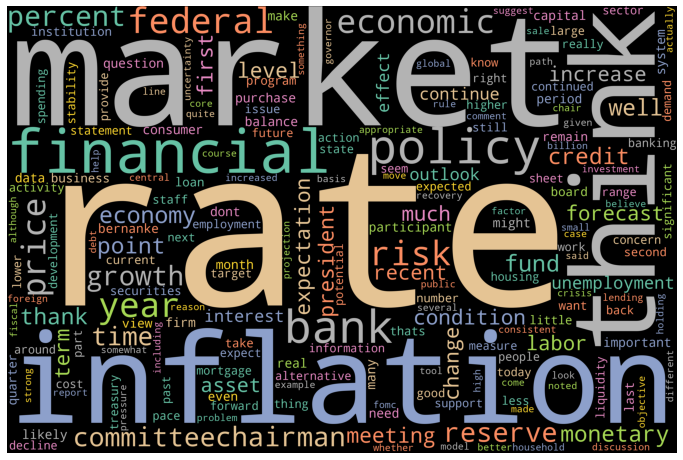

In [26]:
plot_word_cloud(full_text)

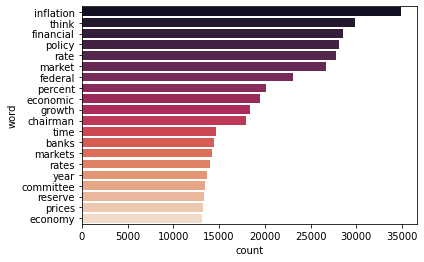

In [27]:
plot_word_frequency(full_text)

#### Financial Crisis (Dec 2007 - June 2009)

In [28]:
fin_crisis_period = data[(pd.to_datetime(data.index) >= pd.to_datetime('2007-12-01')) & (pd.to_datetime(data.index) <= pd.to_datetime('2009-06-30'))]

In [29]:
full_text = ""
for text in fin_crisis_period.cleaned_nostop:
    full_text += text

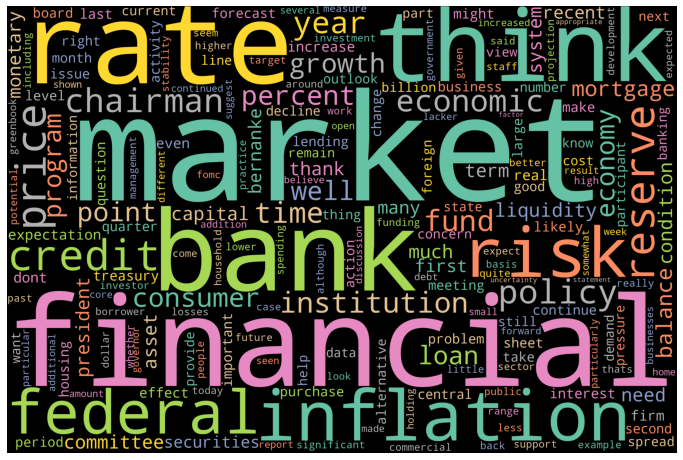

In [30]:
plot_word_cloud(full_text)

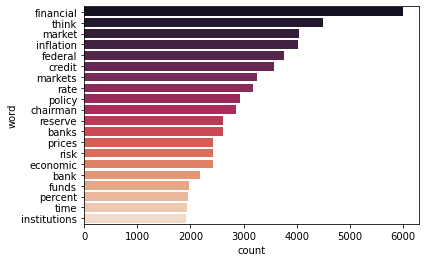

In [31]:
plot_word_frequency(full_text)

#### Covid-19 (Dec 2019 - 2021)

In [32]:
covid_period = data[pd.to_datetime(data.index) >= pd.to_datetime('2019-12-31')]

In [33]:
full_text = ""
for text in covid_period.cleaned_nostop:
    full_text += text

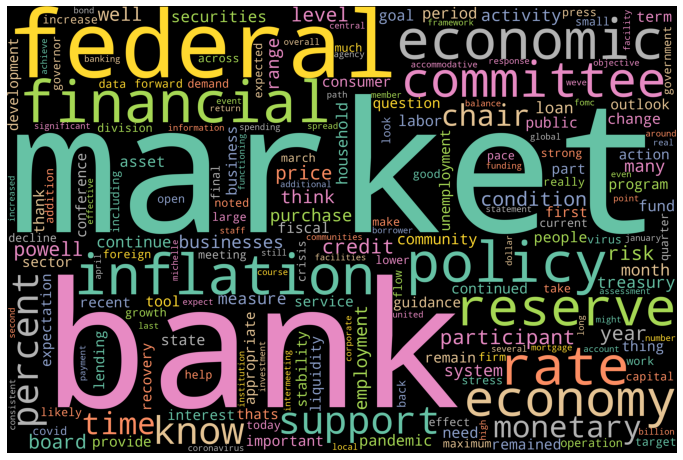

In [34]:
plot_word_cloud(full_text)

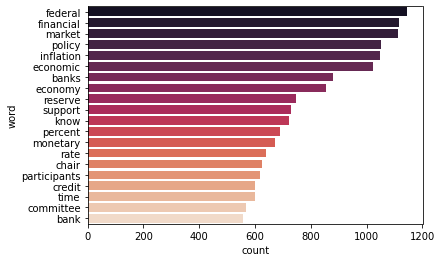

In [35]:
plot_word_frequency(full_text)

## Conclusion

The dataset is satisfactory but will require some form of preprocessing in subsequent notebooks before it can be used for machine learning.

In the next notebook, 03_Feature-Engineering-w-Finbert-Sentiment-Analysis, we will explore the use of FinBert to generate new features by producing a sentiment score on text.